<a href="https://colab.research.google.com/github/Anzi85/Energy_PI_2022/blob/main/Petroineos_GC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 3.3 MB/s 


In [3]:
import pandas as pd
import datetime
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time
import cufflinks as cf
import plotly.graph_objects as go
import mplfinance as mpl 
from mplfinance.original_flavor import candlestick_ohlc

## Question 1

In [5]:
## Q1
## You are provided with data with 10-mins, 60-mins and 1-day resolution (Merge.csv)
## Please merge them into a pandas Dataframe with 2-hours resolution in between 7:00 – 17:00 
## only as index. 
## Please take the average of the 10-mins and 60-mins resolution prices during the 2-hours 
## window and forward fill the 1-day resolution prices in the 2-hours window.

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
location="/content/gdrive/My Drive/Petroineos_2022/"

In [8]:
## Q1
## You are provided with data with 10-mins, 60-mins and 1-day resolution (Merge.csv)
## Please merge them into a pandas Dataframe with 2-hours resolution in between 7:00 – 17:00 
## only as index. 
## Please take the average of the 10-mins and 60-mins resolution prices during the 2-hours 
## window and forward fill the 1-day resolution prices in the 2-hours window.

In [11]:
##Load the data to the following pandas dataframe
df_merge=pd.read_csv(location + 'Merge.csv')

In [12]:
##Initial exploratory analysis of the data and field types
## df_merge.head(3)
## df_merge.info()
## df_merge.describe()
## df_merge.groupby('Resolution').count()
## df_merge.sort_values(by=['Datetime'])

In [13]:
##Converting the [Datetime] field to datetime field type
df_merge['Datetime']=pd.to_datetime(df_merge['Datetime'])

In [14]:
## Setting the Datetime field as an pandas dataframe index
df_merge=df_merge.set_index('Datetime')

In [15]:
## Setting up the final pandas with the relevant 2 hour window
df_merge_10MIN=df_merge[df_merge['Resolution']=='10MIN'].groupby(pd.Grouper(freq='2H')).mean()
df_merge_10MIN['Resolution']='10MIN'
df_merge_1H=df_merge[df_merge['Resolution']=='1H'].groupby(pd.Grouper(freq='2H')).mean()
df_merge_1H['Resolution']='1H'
df_merge_D=df_merge[df_merge['Resolution']=='D']
df_merge_D=df_merge_D[['Price']].asfreq('2H', method='ffill')
df_merge_D['Resolution']='D'
df_merge_2=df_merge_10MIN
df_merge_2=pd.concat([df_merge_2, df_merge_1H])
df_merge_2=pd.concat([df_merge_2, df_merge_D])

In [16]:
## Final pandas to sense check
df_merge_2.head(3)

,Price,Resolution
Datetime,,
2021-11-01 06:00:00,71.050000,10MIN
2021-11-01 08:00:00,71.414583,10MIN
2021-11-01 10:00:00,70.347917,10MIN


In [17]:
## The average of the 10-mins resolution prices during the 2-hours window
df_merge_2[df_merge_2['Resolution']=='10MIN'].between_time('07:00:00','17:00:00')

,Price,Resolution
Datetime,,
2021-11-01 08:00:00,71.414583,10MIN
2021-11-01 10:00:00,70.347917,10MIN
2021-11-01 12:00:00,65.541667,10MIN
2021-11-01 14:00:00,64.685417,10MIN
2021-11-01 16:00:00,65.187500,10MIN
...,...,...
2021-11-30 08:00:00,98.237500,10MIN
2021-11-30 10:00:00,97.900000,10MIN
2021-11-30 12:00:00,96.037500,10MIN


In [18]:
## The average of the 60-mins resolution prices during the 2-hours window
df_merge_2[df_merge_2['Resolution']=='1H'].between_time('07:00:00','17:00:00')

,Price,Resolution
Datetime,,
2021-11-01 08:00:00,71.5125,1H
2021-11-01 10:00:00,69.5750,1H
2021-11-01 12:00:00,64.6500,1H
2021-11-01 14:00:00,64.5750,1H
2021-11-01 16:00:00,67.0000,1H
...,...,...
2021-11-30 08:00:00,98.7500,1H
2021-11-30 10:00:00,97.5000,1H
2021-11-30 12:00:00,96.3750,1H


In [19]:
## Forward filled DataFrame wwith the 1-day resolution prices in the 2-hours window
df_merge_2[df_merge_2['Resolution']=='D'].between_time('07:00:00','17:00:00')

,Price,Resolution
Datetime,,
2021-11-01 08:00:00,66.1,D
2021-11-01 10:00:00,66.1,D
2021-11-01 12:00:00,66.1,D
2021-11-01 14:00:00,66.1,D
2021-11-01 16:00:00,66.1,D
...,...,...
2021-11-29 08:00:00,94.9,D
2021-11-29 10:00:00,94.9,D
2021-11-29 12:00:00,94.9,D


In [20]:
## Additional visualization could be enabled.
#a1_dims = (20, 10)
#fig, (ax) = plt.subplots(1, 1, figsize=a1_dims)

### The average of the 10-mins resolution prices during the 2-hours window
#sns.lineplot(ax=ax, data=df_merge_2[df_merge_2['Resolution']=='10MIN'].between_time('07:00:00','17:00:00'), x=df_merge_2[df_merge_2['Resolution']=='10MIN'].between_time('07:00:00','17:00:00').index ,y='Price', color='b', label='Average of 10 mins price within 2H Window', legend = True)
## The average of the 60-mins resolution prices during the 2-hours window
#sns.lineplot(ax=ax, data=df_merge_2[df_merge_2['Resolution']=='1H'].between_time('07:00:00','17:00:00'), x=df_merge_2[df_merge_2['Resolution']=='1H'].between_time('07:00:00','17:00:00').index ,y='Price', color='g', label='Average 60 mins price within 2H Window', legend = True)
## Forward filled DataFrame wwith the 1-day resolution prices in the 2-hours window
#sns.lineplot(ax=ax, data=df_merge_2[df_merge_2['Resolution']=='D'].between_time('07:00:00','17:00:00'), x=df_merge_2[df_merge_2['Resolution']=='D'].between_time('07:00:00','17:00:00').index ,y='Price', color='y', label='Forward filled 1 day resolution price  within 2H Window', legend = True)

## Question 2

In [22]:
## Q2
## You are provided with a daily energy consumption data from 2016 to date (Consumption.csv). 
## Please create a Pandas DataFrame with to show the consumption of each year. The expected format 
## is to have the year number as column name and mm-dd as index.
## Please also create a seasonal plot showing 5-years (2016-2020) range (shaded) & average (dashed 
## line), and year 2021 (line) & 2022 (line).
## Please comment on your observation on the plot

In [24]:
##Load the data to the following pandas dataframe
df_consumption=pd.read_csv(location + 'Consumption.csv')

In [25]:
## Initial exploratory analysis of the data and field types
## df_consumption.head(3)
## df_consumption.info()
## df_consumption.describe()
## df_consumption['Date'].duplicated().count()
## df_consumption['Date_len']=len(df_consumption['Date'])
## df_consumption_7=df_consumption[df_consumption['Date_len']==7]
## Date length analysis


In [26]:
df_consumption

,Date,Consumption
0,01/01/2016,276.2910
1,02/01/2016,294.6780
2,03/01/2016,306.3096
3,04/01/2016,370.0566
4,05/01/2016,367.3998
...,...,...
2463,29/09/2022,258.0822
2464,30/09/2022,242.5950
2465,01/10/2022,188.0658
2466,02/10/2022,190.6092


In [27]:
global previous_Month
previous_Month=[None] 
def is_date_matching_2(date_str, RowNum):
    try:
        if len(date_str)==6:
            format = '%dd%mm%yyyy'
            date_str_2 = date_str[5:6] + '/' + date_str[4:5] + '/' + date_str[:4]
            previous_Month[0]=date_str[4:5]
            df_consumption['Date_2'].values[RowNum]=str(datetime.datetime.strptime(date_str_2, '%d/%m/%Y'))
        elif len(date_str) ==7:
            if date_str[4:7] == '111':
                if df_consumption['Date'].values[RowNum-1][4:7] == '110':
                    date_str_2a = date_str[5:7] + '/0' + date_str[4:5] + '/' + date_str[:4]
                    previous_Month[0]=date_str[4:5]
                    df_consumption['Date_2'].values[RowNum]=datetime.datetime.strptime(date_str_2a, '%d/%m/%Y')
                elif df_consumption['Date'].values[RowNum-1][4:8] == '1031':
                    date_str_2 = '0' + date_str[6:7] + '/' + date_str[4:6] + '/' + date_str[:4]
                    previous_Month[0]=date_str[4:6]
                    df_consumption['Date_2'].values[RowNum]=datetime.datetime.strptime(date_str_2, '%d/%m/%Y')
            elif date_str[4:7] == '121':
                if df_consumption['Date'].values[RowNum-1][4:7] == '120':
                    date_str_2a = date_str[5:7] + '/0' + date_str[4:5] + '/' + date_str[:4]
                    previous_Month[0]=date_str[4:5]
                    df_consumption['Date_2'].values[RowNum]=datetime.datetime.strptime(date_str_2a, '%d/%m/%Y')
                elif df_consumption['Date'].values[RowNum-1][4:8] == '1130':
                    date_str_2 = '0' + date_str[6:7] + '/' + date_str[4:6] + '/' + date_str[:4]
                    previous_Month[0]=date_str[4:6]
                    df_consumption['Date_2'][RowNum]=datetime.datetime.strptime(date_str_2, '%d/%m/%Y')
            elif date_str[3:7] == '101':
                if df_consumption['Date'].values[RowNum-1][4:7] == '930':
                    date_str_2 = '0' + date_str[6:7] + '/' + date_str[4:6] + '/' + date_str[:4]
                    previous_Month[0]=date_str[4:6]
                    df_consumption['Date_2'][RowNum]=datetime.datetime.strptime(date_str_2, '%d/%m/%Y')
            elif int(df_consumption['Date'].values[RowNum])>=2020101 and int(df_consumption['Date'].values[RowNum])<=2020109:
                date_str_2 = date_str[5:7] + '/' + date_str[4:6] + '/' + date_str[:4]
                df_consumption['Date_2'].values[RowNum]=datetime.datetime.strptime(date_str_2, '%d/%m/%Y')       
            elif int(df_consumption['Date'].values[RowNum])>=2020112 and int(df_consumption['Date'].values[RowNum])<=2020129:
                if len(str(previous_Month[0])) == 1:
                    date_str_2 = date_str[5:7] + '/0' + str(previous_Month[0]) + '/' + date_str[:4]
                else:
                    date_str_2 = '0' + date_str[6:7] + '/' + str(previous_Month[0]) + '/' + date_str[:4]
                df_consumption['Date_2'].values[RowNum]=datetime.datetime.strptime(date_str_2, '%d/%m/%Y')
            else:
                if len(str(previous_Month[0])) == 1:
                    date_str_2 = date_str[5:7] + '/0' + str(previous_Month[0]) + '/' + date_str[:4]
                else:
                    date_str_2 = date_str[5:7] + '/' + str(previous_Month[0]) + '/' + date_str[:4]
                df_consumption['Date_2'].values[RowNum]=datetime.datetime.strptime(date_str_2, '%d/%m/%Y')        
        elif len(date_str)==8:
            date_str_2 = date_str[6:8] + '/' + date_str[4:6] + '/' + date_str[:4]
            df_consumption['Date_2'].values[RowNum]=str(datetime.datetime.strptime(date_str_2, '%d/%m/%Y'))
        else:
            df_consumption['Date_2'].values[RowNum]=str(datetime.datetime.strptime(date_str, '%d/%m/%Y'))
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")
        return False

In [28]:
## Running the Date conversion procedure to standardize the dates
df_consumption['Date_2']=''
df_consumption['Date_2']=pd.to_datetime(df_consumption['Date_2'])
for i in range(len(df_consumption)):
    is_date_matching_2(df_consumption['Date'].values[i], i)

In [29]:
## Creating the Year field from the standardized date field called 'Date_2'
df_consumption['Year']=0
df_consumption['Year']=pd.DatetimeIndex(df_consumption['Date_2']).year

In [30]:
## Creating the month-day field from the standardized date field called 'Date_2'
df_consumption['mm-dd']=''
df_consumption['mm-dd']=df_consumption['Date_2'].dt.strftime('%m-%d')

In [31]:
## Checking the Year numbers
##df_consumption['Year'].unique()

In [32]:
## Setting mm-dd field as index for the Pandas Dataframe
df_consumption=df_consumption.set_index('mm-dd')

In [33]:
## Creating the required Pandas Dataframe structure
df_consumption_2 = df_consumption.pivot_table('Consumption', ['mm-dd'], 'Year')

In [34]:
df_consumption_2

Year,2016,2017,2018,2019,2020,2021,2022
mm-dd,,,,,,,
01-01,276.2910,339.5196,305.9370,313.6320,344.9952,344.0718,246.6612
01-02,294.6780,405.7614,365.8932,391.3758,380.8296,362.9772,263.8980
01-03,306.3096,407.3976,368.2746,424.1646,356.8698,365.1480,316.3698
01-04,370.0566,419.0454,372.1140,404.0766,348.2028,436.0716,348.6078
01-05,367.3998,457.1640,367.8534,364.0140,357.5502,446.6340,360.4338
...,...,...,...,...,...,...,...
12-27,329.5728,347.8140,358.4736,337.5432,320.3550,330.2694,NaN
12-28,352.5606,357.4044,356.5296,343.2780,363.7872,311.3802,NaN
12-29,365.2614,351.6534,330.2370,338.0292,365.9094,299.7648,NaN


Text(0, 0.5, 'Monthly Average Energy Consumption')

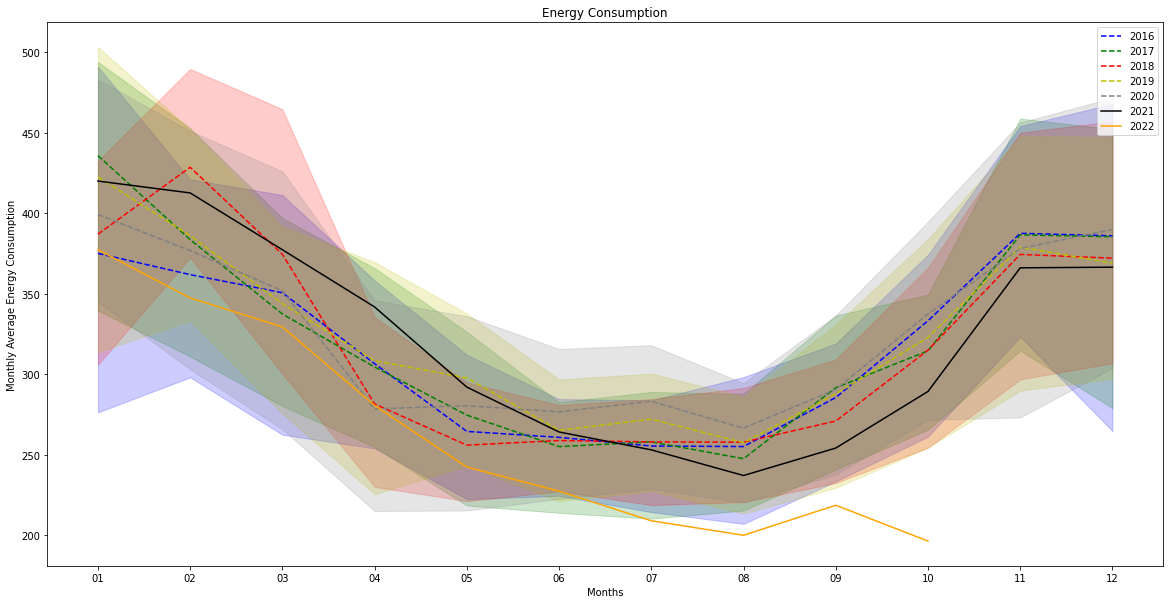

In [35]:
## Creating the required Chart for the Question
a1_dims = (20, 10)
fig, (ax) = plt.subplots(1, 1, figsize=a1_dims)


sns.lineplot(ax=ax, data=df_consumption_2.groupby(df_consumption_2.index.str[:2]).mean(), x='mm-dd' ,y=2016, color='b', label='2016', legend = True, linestyle='--')
plt.fill_between(df_consumption_2[2016].index.str[:2].unique(), df_consumption_2[2016].groupby(df_consumption_2.index.str[:2]).min(), df_consumption_2[2016].groupby(df_consumption_2.index.str[:2]).max(2016), color='b' , alpha=0.20)
sns.lineplot(ax=ax, data=df_consumption_2.groupby(df_consumption_2.index.str[:2]).mean(), x='mm-dd' ,y=2017, color='g', label='2017', legend = True, linestyle='--')
plt.fill_between(df_consumption_2[2017].index.str[:2].unique(), df_consumption_2[2017].groupby(df_consumption_2.index.str[:2]).min(), df_consumption_2[2017].groupby(df_consumption_2.index.str[:2]).max(2017), color='g' , alpha=0.20)
sns.lineplot(ax=ax, data=df_consumption_2.groupby(df_consumption_2.index.str[:2]).mean(), x='mm-dd' ,y=2018, color='r', label='2018', legend = True, linestyle='--')
plt.fill_between(df_consumption_2[2018].index.str[:2].unique(), df_consumption_2[2018].groupby(df_consumption_2.index.str[:2]).min(), df_consumption_2[2018].groupby(df_consumption_2.index.str[:2]).max(2018), color='r' , alpha=0.20)
sns.lineplot(ax=ax, data=df_consumption_2.groupby(df_consumption_2.index.str[:2]).mean(), x='mm-dd' ,y=2019, color='y', label='2019', legend = True, linestyle='--')
plt.fill_between(df_consumption_2[2019].index.str[:2].unique(), df_consumption_2[2019].groupby(df_consumption_2.index.str[:2]).min(), df_consumption_2[2019].groupby(df_consumption_2.index.str[:2]).max(2019), color='y' , alpha=0.20)
sns.lineplot(ax=ax, data=df_consumption_2.groupby(df_consumption_2.index.str[:2]).mean(), x='mm-dd' ,y=2020, color='grey', label='2020', legend = True, linestyle='--')
plt.fill_between(df_consumption_2[2020].index.str[:2].unique(), df_consumption_2[2020].groupby(df_consumption_2.index.str[:2]).min(), df_consumption_2[2020].groupby(df_consumption_2.index.str[:2]).max(2020), color='grey' , alpha=0.20)
sns.lineplot(ax=ax, data=df_consumption_2.groupby(df_consumption_2.index.str[:2]).mean(), x='mm-dd' ,y=2021, color='black', label='2021', legend = True)
sns.lineplot(ax=ax, data=df_consumption_2.groupby(df_consumption_2.index.str[:2]).mean(), x='mm-dd' ,y=2022, color='orange', label='2022', legend = True)


plt.title("Energy Consumption")
plt.xlabel("Months")
plt.ylabel("Monthly Average Energy Consumption")


## Energy Consumption Report
#### Generally the winter period is the most energy demanding period given the high energy consumption during that period as shown on the chart above. 
#### In 2018 there seems to be a lag in the winter consumtion period when the energy consumption spiked which could be the result of the Beast from the East storms. (https://en.wikipedia.org/wiki/2018_British_Isles_cold_wave)
#### In the second half of 2021 average monthly consumption seems to have dropped below of the average of the previous years.
#### In 2021 November and December average monthly consumption seems to be flattened out which could raise futher question for any additional analysis why the cause of that could be.
#### In 2022 there seems to be a less than average trend shown especially from May till September which could be related to the energy crisis we are facing and this overall lower energy consumption trend seems to have started in the second half of 2021. The other reason could be that more energy efficient application being purchased/ used.

## Question 3

In [36]:
## Q3
## A robot moves around a flat surface from position (0,0). It accepts instructions, and moves accordingly. 
## For example:
## “BEGIN”
## LEFT 3
## UP 5
## RIGHT 4
## DOWN 7
## The first word indicates direction and the number shows steps.
## The robot will stop moving with instruction “STOP”. 
## Please write a function, which accepts instructions as a list. When first “STOP” instruction is given, it 
## calculates the distance of Robot from the original position (0,0)

In [37]:
class Robot(object):
    def __init__(self, n=(0,0)):
        self.n = n
        post = list(n)
        self.x = post[0]
        self.y = post[1]
    def distance(self):
        return (self.x **2 + self.y **2) **0.5

    def position(self):
        print("x: ", self.x,"y: ", self.y)

    def movement(self,direction,move):
        x_d = self.x
        y_d = self.y
        if direction.upper() == "UP":
            y_d = self.y + move
        elif direction.upper() == "DOWN":
            y_d = self.y - move
        elif direction.upper() == "RIGHT":
            x_d = self.x + move
        elif direction.upper() == "LEFT":
            x_d = self.x - move
        self.x = x_d
        self.y = y_d
        return 0

lt_direction = ["UP","DOWN","LEFT","RIGHT"]
robot = Robot()

while True:
    QaA = input('Would you like to make a move? (BEGIN/STOP)')
    while QaA.upper() == 'BEGIN' and QaA.upper() != "STOP":
        a = input('Input DIRECTION /UP-RIGHT-DOWN-LEFT/ AND DISTANCE ').split()
        if a[0].upper() in lt_direction:
            robot.movement(a[0], float(a[1]))
            print("Position: ")
            robot.position()
            print ("distance ",robot.distance())
        elif a[0].upper() == "STOP":
            print("You've stopped and your last position and distance details are the followings.")
            print("Position: ")
            robot.position()
            print ("distance ",robot.distance())
            break
        else: 
            print('Invalid Input')  
    print("You've stopped.")
    break

Would you like to make a move? (BEGIN/STOP)begin
Input DIRECTION /UP-RIGHT-DOWN-LEFT/ AND DISTANCE left 5
Position: 
x:  -5.0 y:  0
distance  5.0
Input DIRECTION /UP-RIGHT-DOWN-LEFT/ AND DISTANCE right 10
Position: 
x:  5.0 y:  0
distance  5.0
Input DIRECTION /UP-RIGHT-DOWN-LEFT/ AND DISTANCE stop
You've stopped and your last position and distance details are the followings.
Position: 
x:  5.0 y:  0
distance  5.0
You've stopped.


## Question 4

In [38]:
## Q4 
## You are provided with sample trades data in a data file (trades.csv). It contains a collection of trade 
## data during 5 working days with volume and price. You are asked to process the sample data into a 
## data set for creating the candlestick plots, with open, high, low & close prices (OHLC) and total volume 
## for each product and contract, over a time interval.
## You are expected to write a function to create a dataframe contains OHLC and trading volume with 
## (begin, end, product(s), freq) as input. It should be able take freq input, e.g., 15MIN, 1H, 1D.

## Note: 
## • The product “Emission - Venue A” and “Emission - Venue B” are the same product trading in 
## two different venues, please combine them when queried
## • If product list has more than one contract, please generate OHLC and volume data for each 
## contract
## • Please limit output within trading hours, i.e., 7:00 – 17:00, except when freq >= 1D
## • Please do not use OHLC resample

In [40]:
## Uploading the data to the following Pandas DataFrame
df_trade=pd.read_csv(location + 'Trades.csv')

In [41]:
## Initial exploratory analysis of the data and field types
## df_trade.head(3)
## df_trade.info()
## df_trade.describe()

In [42]:
## Converting the TradeDateTime field to datetime field type
df_trade['TradeDateTime_2']=pd.to_datetime(df_trade['TradeDateTime'])

In [43]:
## Setting the converted trade datetime field as index
df_trade_2=df_trade
df_trade_2=df_trade_2.set_index('TradeDateTime_2')

In [44]:
### OHLC procedure to give the relevant report and chart for the user
def OHLC(begin, end, product, freq_in):
    global df_trade_2a
    global df_trade_3
    global df_trade_3_chart
    
    ## Selecting the relevant calculation/ chart method for the emission and other products
    
    for i in product:
        if i == 'Emission - Venue A':
            version = 'B'
            if 'Emission - Venue B' not in product:
                product.append('Emission - Venue B')
                product_chart = 'Emission - Venue A/B'
                product_chart_Olst=product
                product_chart_Olst = list(map(lambda x: x.replace('Emission - Venue A', 'Emission - Venue A/B'), product_chart_Olst))
                product_chart_Olst = list(map(lambda x: x.replace('Emission - Venue B', 'Emission - Venue A/B'), product_chart_Olst))
                product_chart_Olst=set(product_chart_Olst)
                product_chart_Olst=list(product_chart_Olst)
            if 'Energy' in product:
                product_chart_2 = 'Energy'
            break
        elif i == 'Emission - Venue B':
            version = 'B'
            if 'Emission - Venue A' not in product:
                product.append('Emission - Venue A')
                product_chart = 'Emission - Venue A/B'
                product_chart_Olst=product
                product_chart_Olst = list(map(lambda x: x.replace('Emission - Venue A', 'Emission - Venue A/B'), product_chart_Olst))
                product_chart_Olst = list(map(lambda x: x.replace('Emission - Venue B', 'Emission - Venue A/B'), product_chart_Olst))
                product_chart_Olst=set(product_chart_Olst)
                product_chart_Olst=list(product_chart_Olst)
            if 'Energy' in product:
                product_chart_2 = 'Energy'
            break
        else:
            product_chart_Olst=product
            version = 'A'    
    
    ## Product and time selection criteria
    df_trade_2aa=df_trade_2[df_trade_2['Product'].isin(product)] 
    begin = begin + ' 00:00:00'   
    end = end + ' 23:59:59'
    df_trade_2aa=df_trade_2aa.loc[begin:end]
    if freq_in != '1D':
        df_trade_2a=df_trade_2aa.between_time('07:00:00', '17:00:00')
    else:
        df_trade_2a=df_trade_2aa
 
    df_trade_3=df_trade_2a.groupby(['Product', 'Contract', pd.Grouper(freq=freq_in)])[['Price']].min()
    df_trade_3=df_trade_3.rename(columns={'Price': 'Min_Price'})
    df_trade_3a=df_trade_2a.groupby(['Product', 'Contract', pd.Grouper(freq=freq_in)])[['Price']].max()
    df_trade_3a=df_trade_3a.rename(columns={'Price': 'Max_Price'})
    df_trade_3=pd.merge(df_trade_3, df_trade_3a, left_on=['Product', 'Contract','TradeDateTime_2'], right_on = ['Product', 'Contract','TradeDateTime_2'])###left_index=True, right_index=True)
    df_trade_3b=df_trade_2a.groupby(['Product', 'Contract', pd.Grouper(freq=freq_in)])[['Quantity']].sum()
    df_trade_3b=df_trade_3b.rename(columns={'Quantity': 'Trading Volume'})
    
    
    
    df_trade_4=df_trade_2a.groupby(['Product', 'Contract', pd.Grouper(freq=freq_in)])[['TradeDateTime']].min()
    df_trade_4=df_trade_4.rename(columns={'TradeDateTime': 'Min_Time'})
    df_trade_4['Max_Time']=df_trade_2a.groupby(['Product', 'Contract', pd.Grouper(freq=freq_in)])[['TradeDateTime']].max()
    df_trade_4['Open_Price']=np.nan
    df_trade_4['Close_Price']=np.nan

    
    df_trade_4a=df_trade_4.merge(df_trade_2a[['Product', 'Contract','Price', 'TradeDateTime']], left_on=["Min_Time", "Product", "Contract"], right_on=["TradeDateTime", "Product", "Contract"])
    df_trade_4b=df_trade_4a.groupby(['Product', 'Contract','Min_Time'])[['Price']].max()
    df_trade_4c=df_trade_4.merge(df_trade_2a[['Product', 'Contract','Price', 'TradeDateTime']], left_on=["Max_Time", "Product", "Contract"], right_on=["TradeDateTime", "Product", "Contract"])
    df_trade_4d=df_trade_4c.groupby(['Product', 'Contract','Max_Time'])[['Price']].max()
    df_trade_4b=df_trade_4b.reset_index(level='Min_Time')
    df_trade_4b['TradeDateTime_2']=pd.to_datetime(df_trade_4b['Min_Time']).dt.date
    df_trade_4b['TradeDateTime_2']=df_trade_4b['TradeDateTime_2'].astype(str)
    df_trade_4=df_trade_4.reset_index()
    df_trade_4b=df_trade_4b.reset_index()
    df_trade_4['Open_Price']=df_trade_4b['Price'][(df_trade_4b['Product'].isin(df_trade_4['Product']))&(df_trade_4b['Contract'].isin(df_trade_4['Contract']))&(df_trade_4b['Min_Time'].isin(df_trade_4['Min_Time']))]
    df_trade_4b=df_trade_4b.set_index(['Product', 'Contract', 'TradeDateTime_2'])

    df_trade_4d=df_trade_4d.reset_index(level='Max_Time')
    df_trade_4d['TradeDateTime_2']=pd.to_datetime(df_trade_4d['Max_Time']).dt.date
    df_trade_4d['TradeDateTime_2']=df_trade_4d['TradeDateTime_2'].astype(str)
    df_trade_4d=df_trade_4d.reset_index()
    df_trade_4['Close_Price']=df_trade_4d['Price'][(df_trade_4d['Product'].isin(df_trade_4['Product']))&(df_trade_4d['Contract'].isin(df_trade_4['Contract']))&(df_trade_4d['Max_Time'].isin(df_trade_4['Max_Time']))]
    df_trade_4d=df_trade_4d.set_index(['Product', 'Contract', 'TradeDateTime_2'])
    
    
    
    df_trade_3=df_trade_3.reset_index()
    df_trade_3['Open_Price'] = df_trade_4['Open_Price'][(df_trade_3['Product'].isin(df_trade_4['Product']))&(df_trade_3['Contract'].isin(df_trade_4['Contract']))&(df_trade_3['TradeDateTime_2'].isin(df_trade_4['TradeDateTime_2']))]
    df_trade_3['Close_Price'] = df_trade_4['Close_Price'][(df_trade_3['Product'].isin(df_trade_4['Product']))&(df_trade_3['Contract'].isin(df_trade_4['Contract']))&(df_trade_3['TradeDateTime_2'].isin(df_trade_4['TradeDateTime_2']))]
    
    df_trade_3=pd.merge(df_trade_3, df_trade_3b, left_on=['Product', 'Contract','TradeDateTime_2'], right_on = ['Product', 'Contract','TradeDateTime_2'])###left_index=True, right_index=True) 
    df_trade_4=df_trade_4.set_index(['Product', 'Contract', 'TradeDateTime_2'])
    df_trade_3=df_trade_3.rename(columns={'TradeDateTime_2':'Trade Date'})
    df_trade_3=df_trade_3.set_index(['Product', 'Contract', 'Trade Date'])
    df_trade_3_chart=df_trade_3.reset_index()
    df_trade_3_chart=df_trade_3_chart.set_index(['Trade Date'])
    df_trade_3_chart=df_trade_3_chart.rename(columns={'Max_Price': 'high', 'Min_Price': 'low', 'Open_Price': 'open', 'Close_Price': 'close'})
    
    ## This is where the combination of the Emission venues are done and the Energy product is added to the same dataframe
    if version == 'B':
        df_trade_3_XX=df_trade_3
        df_trade_3_XX=df_trade_3_XX.reset_index()
        df_trade_3_XA=df_trade_3_XX[(df_trade_3_XX['Product']=='Emission - Venue A')|(df_trade_3_XX['Product']=='Emission - Venue B')]
        df_trade_3_XA=df_trade_3_XA.set_index(['Trade Date'])
        df_trade_3_XB=df_trade_3_XA.groupby(['Contract', pd.Grouper(freq=freq_in)])[['Min_Price']].min()
        df_trade_3_XB['Max_Price']=df_trade_3_XA.groupby(['Contract', pd.Grouper(freq=freq_in)])[['Max_Price']].max()
        df_trade_3_XB['Open_Price']=df_trade_3_XA.groupby(['Contract', pd.Grouper(freq=freq_in)])[['Open_Price']].max()
        df_trade_3_XB['Close_Price']=df_trade_3_XA.groupby(['Contract', pd.Grouper(freq=freq_in)])[['Close_Price']].max()
        df_trade_3_XB['Trading Volume']=df_trade_3_XA.groupby(['Contract', pd.Grouper(freq=freq_in)])[['Trading Volume']].sum()
        df_trade_3_XB['Product']='Emission - Venue A/B '
        df_trade_3_XB.reset_index()
        df_trade_3_XC=df_trade_3_XX[(df_trade_3_XX['Product']!='Emission - Venue A')&(df_trade_3_XX['Product']!='Emission - Venue B')]
        df_trade_3_XB=df_trade_3_XB.reset_index()
        df_trade_3=df_trade_3_XB
        df_trade_3=df_trade_3.reset_index()
        df_trade_3=pd.concat([df_trade_3, df_trade_3_XC])
        df_trade_3=df_trade_3.drop(columns='index')
        df_trade_3=df_trade_3.set_index(['Product', 'Contract', 'Trade Date'])
        df_trade_3_XA_Ch=df_trade_3_XX[(df_trade_3_XX['Product']=='Emission - Venue A')|(df_trade_3_XX['Product']=='Emission - Venue B')]
        contract_Emission ='-'.join(df_trade_3_XA['Contract'].unique())
        df_trade_3_XB_Ch=df_trade_3_XA_Ch
        df_trade_3_XB_Ch=df_trade_3_XB_Ch.set_index(['Trade Date'])
        df_trade_3_XA_Ch=df_trade_3_XA_Ch.set_index(['Trade Date'])
        df_trade_3_XB_Ch['Product']='Emission - Venue A/B'
        df_trade_3_XB_Ch['Contract']=contract_Emission
        df_trade_3_XB_Ch['Min_Price']=df_trade_3_XA_Ch.groupby([pd.Grouper(freq=freq_in)])[['Min_Price']].min()
        df_trade_3_XB_Ch['Max_Price']=df_trade_3_XA_Ch.groupby([ pd.Grouper(freq=freq_in)])[['Max_Price']].max()
        df_trade_3_XB_Ch['Open_Price']=df_trade_3_XA_Ch.groupby([pd.Grouper(freq=freq_in)])[['Open_Price']].max()
        df_trade_3_XB_Ch['Close_Price']=df_trade_3_XA_Ch.groupby([pd.Grouper(freq=freq_in)])[['Close_Price']].max()
        df_trade_3_XB_Ch['Trading Volume']=df_trade_3_XA_Ch.groupby([pd.Grouper(freq=freq_in)])[['Trading Volume']].sum()
        df_trade_3_XB_Ch=df_trade_3_XB_Ch.reset_index()
        df_trade_3_XB_Ch=df_trade_3_XB_Ch.drop_duplicates(subset=['Trade Date'])
        df_trade_3_XC_Ch=df_trade_3_XX[(df_trade_3_XX['Product']!='Emission - Venue A')&(df_trade_3_XX['Product']!='Emission - Venue B')]
        df_trade_3_XB_Ch=df_trade_3_XB_Ch.reset_index()
        df_trade_3_Ch=df_trade_3_XB_Ch
        df_trade_3_Ch=df_trade_3_Ch.reset_index()
        df_trade_3_chart=pd.concat([df_trade_3_Ch, df_trade_3_XC_Ch])
        df_trade_3_chart=df_trade_3_chart.drop(columns=['index'])##, 'Contract'])
        df_trade_3_chart=df_trade_3_chart.set_index(['Trade Date'])       
        df_trade_3_chart=df_trade_3_chart.rename(columns={'Max_Price': 'high', 'Min_Price': 'low', 'Open_Price': 'open', 'Close_Price': 'close'})
        df_trade_3_chart=df_trade_3_chart.drop(columns='level_0')
        
        ## Deleting some local variables from memory
        
        del df_trade_3_XX
        del df_trade_3_XA
        del df_trade_3_XB
    
    # Renaming the final table
    
    df_trade_3=df_trade_3.rename(columns={'Max_Price': 'Max Price', 'Min_Price': 'Min Price', 'Open_Price': 'Open Price', 'Close_Price': 'Close Price'})
        
    ## Deleting some local variables from memory
    
    del df_trade_4a
    del df_trade_4b
    del df_trade_4c
    del df_trade_4d

    
    ## Creating the Candlestick chart/s 
    
    if len(product_chart_Olst) == 1:
        mpl.plot(
        df_trade_3_chart[df_trade_3_chart['Product']==product_chart_Olst[0]],
        type="candle", 
        title =  "Price  of " + product_chart_Olst[0],  
        style="yahoo"
        )
    elif len(product_chart_Olst) > 1:
        mpl.plot(
        df_trade_3_chart[df_trade_3_chart['Product']==product_chart],
        type="candle", 
        title =  "Price  of " + product_chart,  
        style="yahoo"
        )
        mpl.plot(
        df_trade_3_chart[df_trade_3_chart['Product']==product_chart_2],
        type="candle", 
        title =  "Price of " + product_chart_2,  
        style="yahoo"
        )

        

    return df_trade_3


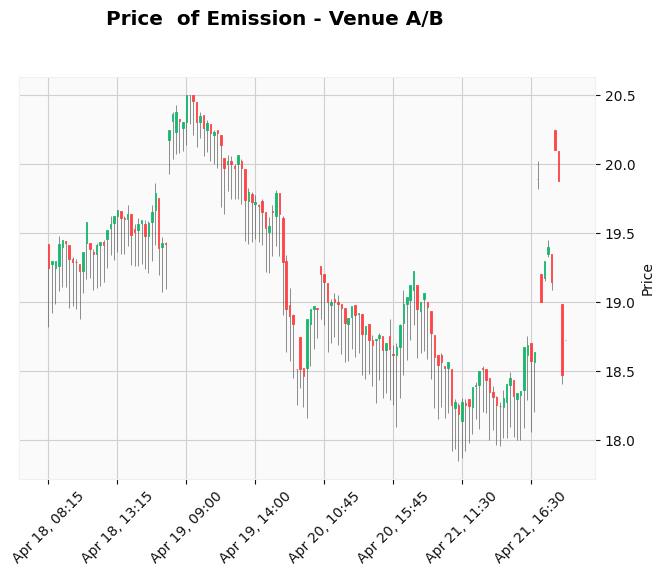

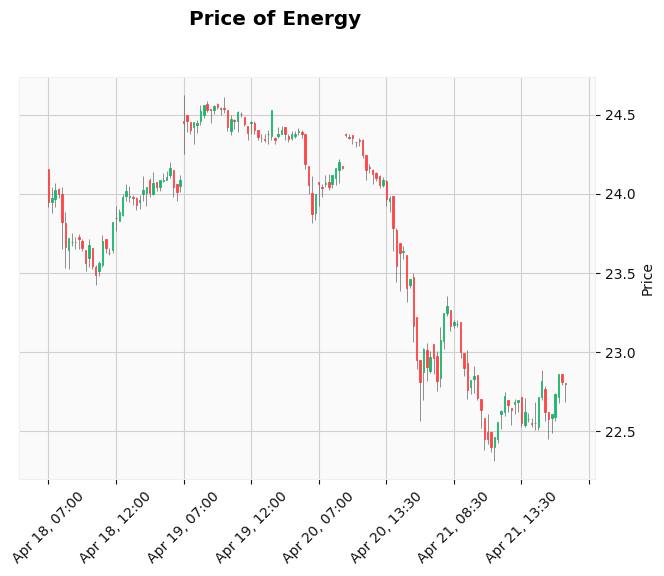

Min Price  Max Price  \
Product               Contract Trade Date                                  
Emission - Venue A/B  DA       2022-04-18 08:15:00   19.25000   19.41875   
                               2022-04-18 08:30:00   19.16250   19.30000   
                               2022-04-18 08:45:00   19.24375   19.30000   
                               2022-04-18 09:00:00   19.26250   19.47500   
                               2022-04-18 09:15:00   19.38750   19.45000   
...                                                       ...        ...   
Energy                Q01      2022-04-21 15:45:00   22.49000   22.60750   
                               2022-04-21 16:00:00   22.56250   22.74000   
                               2022-04-21 16:15:00   22.68000   22.86250   
                               2022-04-21 16:30:00   22.79500   22.86250   
                               2022-04-21 16:45:00   22.68750   22.80750   

                                                    Open Price  Close Price  \
Product               Contract Trade Date                                     
Emission - Venue A/B  DA       2022-04-18 08:15:00    19.41875     19.25000   
                               2022-04-18 08:30:00    19.27500     19.30000   
                               2022-04-18 08:45:00    19.25000     19.30000   
                               2022-04-18 09:00:00    19.26250     19.41875   
                               2022-04-18 09:15:00    19.40000     19.45000   
...                                                        ...          ...   
Energy                Q01      2022-04-21 15:45:00    22.58750     22.60750   
                               2022-04-21 16:00:00    22.59000     22.73500   
                               2022-04-21 16:15:00    22.71750     22.86250   
                               2022-04-21 16:30:00    22.86250     22.81000   
                               2022-04-21 16:45:00    22.80750     22.80000   

                                                    Trading Volume  
Product               Contract Trade Date                           
Emission - Venue A/B  DA       2022-04-18 08:15:00             446  
                               2022-04-18 08:30:00             745  
                               2022-04-18 08:45:00             116  
                               2022-04-18 09:00:00             658  
                               2022-04-18 09:15:00            1360  
...                                                            ...  
Energy                Q01      2022-04-21 15:45:00             588  
                               2022-04-21 16:00:00             865  
                               2022-04-21 16:15:00             692  
                               2022-04-21 16:30:00             378  
                               2022-04-21 16:45:00             437  

[447 rows x 5 columns]

In [45]:
## Running the procedure with the following inputs:
    ## date from: in 'YYYY-MM-DD' format
    ## date till: in 'YYYY-MM-DD' format
    ## product/s in list format ['Emission - Venue A', 'Emission - Venue B', 'Energy'] using quote and bracket
        ## One of the Emission values is sufficient as an input to retrieve both of the values KPIs
    ## fequency: 15MIN, 1H, 1D

OHLC('2022-04-18','2022-04-21',['Energy' , 'Emission - Venue B'],'15MIN')